## Carga de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga de datasets

In [2]:
dataset1 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto74/paso_a_paso.csv')
dataset2 = pd.read_csv('CensoComunal2017.csv',sep=";").drop(index=0).drop(columns=['ORDEN','NOMBRE REGIÓN','CÓDIGO REGIÓN','NOMBRE PROVINCIA','CÓDIGO PROVINCIA','NOMBRE COMUNA','PERSONAS EN VIVIENDAS PARTICULARES OCUPADAS CON MORADORES PRESENTES','PERSONAS EN OTROS OPERATIVOS'])


## Juntamos los datasets

In [3]:
dataset2.columns = ['codigo_comuna','poblacion']
dataset2.replace(',','', regex=True, inplace=True)
dataset2['codigo_comuna'] = pd.to_numeric(dataset2['codigo_comuna'])
dataset2['poblacion'] = pd.to_numeric(dataset2['poblacion'])
dataset1 = pd.merge(dataset1, dataset2, on='codigo_comuna')

## Eliminamos los valores nulos

In [4]:
dataset1 = dataset1.dropna()

## Cargamos la poblacion en cuarentena dia a dia

In [5]:
dias = dataset1.columns[5:-1]
data_regiones = dict()

for dia in dias:
    temp_data = []
    for _, row in dataset1.iterrows():
        estado = row[dia]
        poblacion = row['poblacion']
        region = row['region_residencia']
        if region not in data_regiones.keys():
            data_regiones[region] = dict()
            
        if estado == 1:
            if dia not in data_regiones[region].keys():
                data_regiones[region][dia] = poblacion
            else:
                data_regiones[region][dia] += poblacion
            
print(f'Informacion de {len(data_regiones)} regiones cargada')

Informacion de 16 regiones cargada


## Finalmente graficamos la poblacion en cuarentena dia a dia

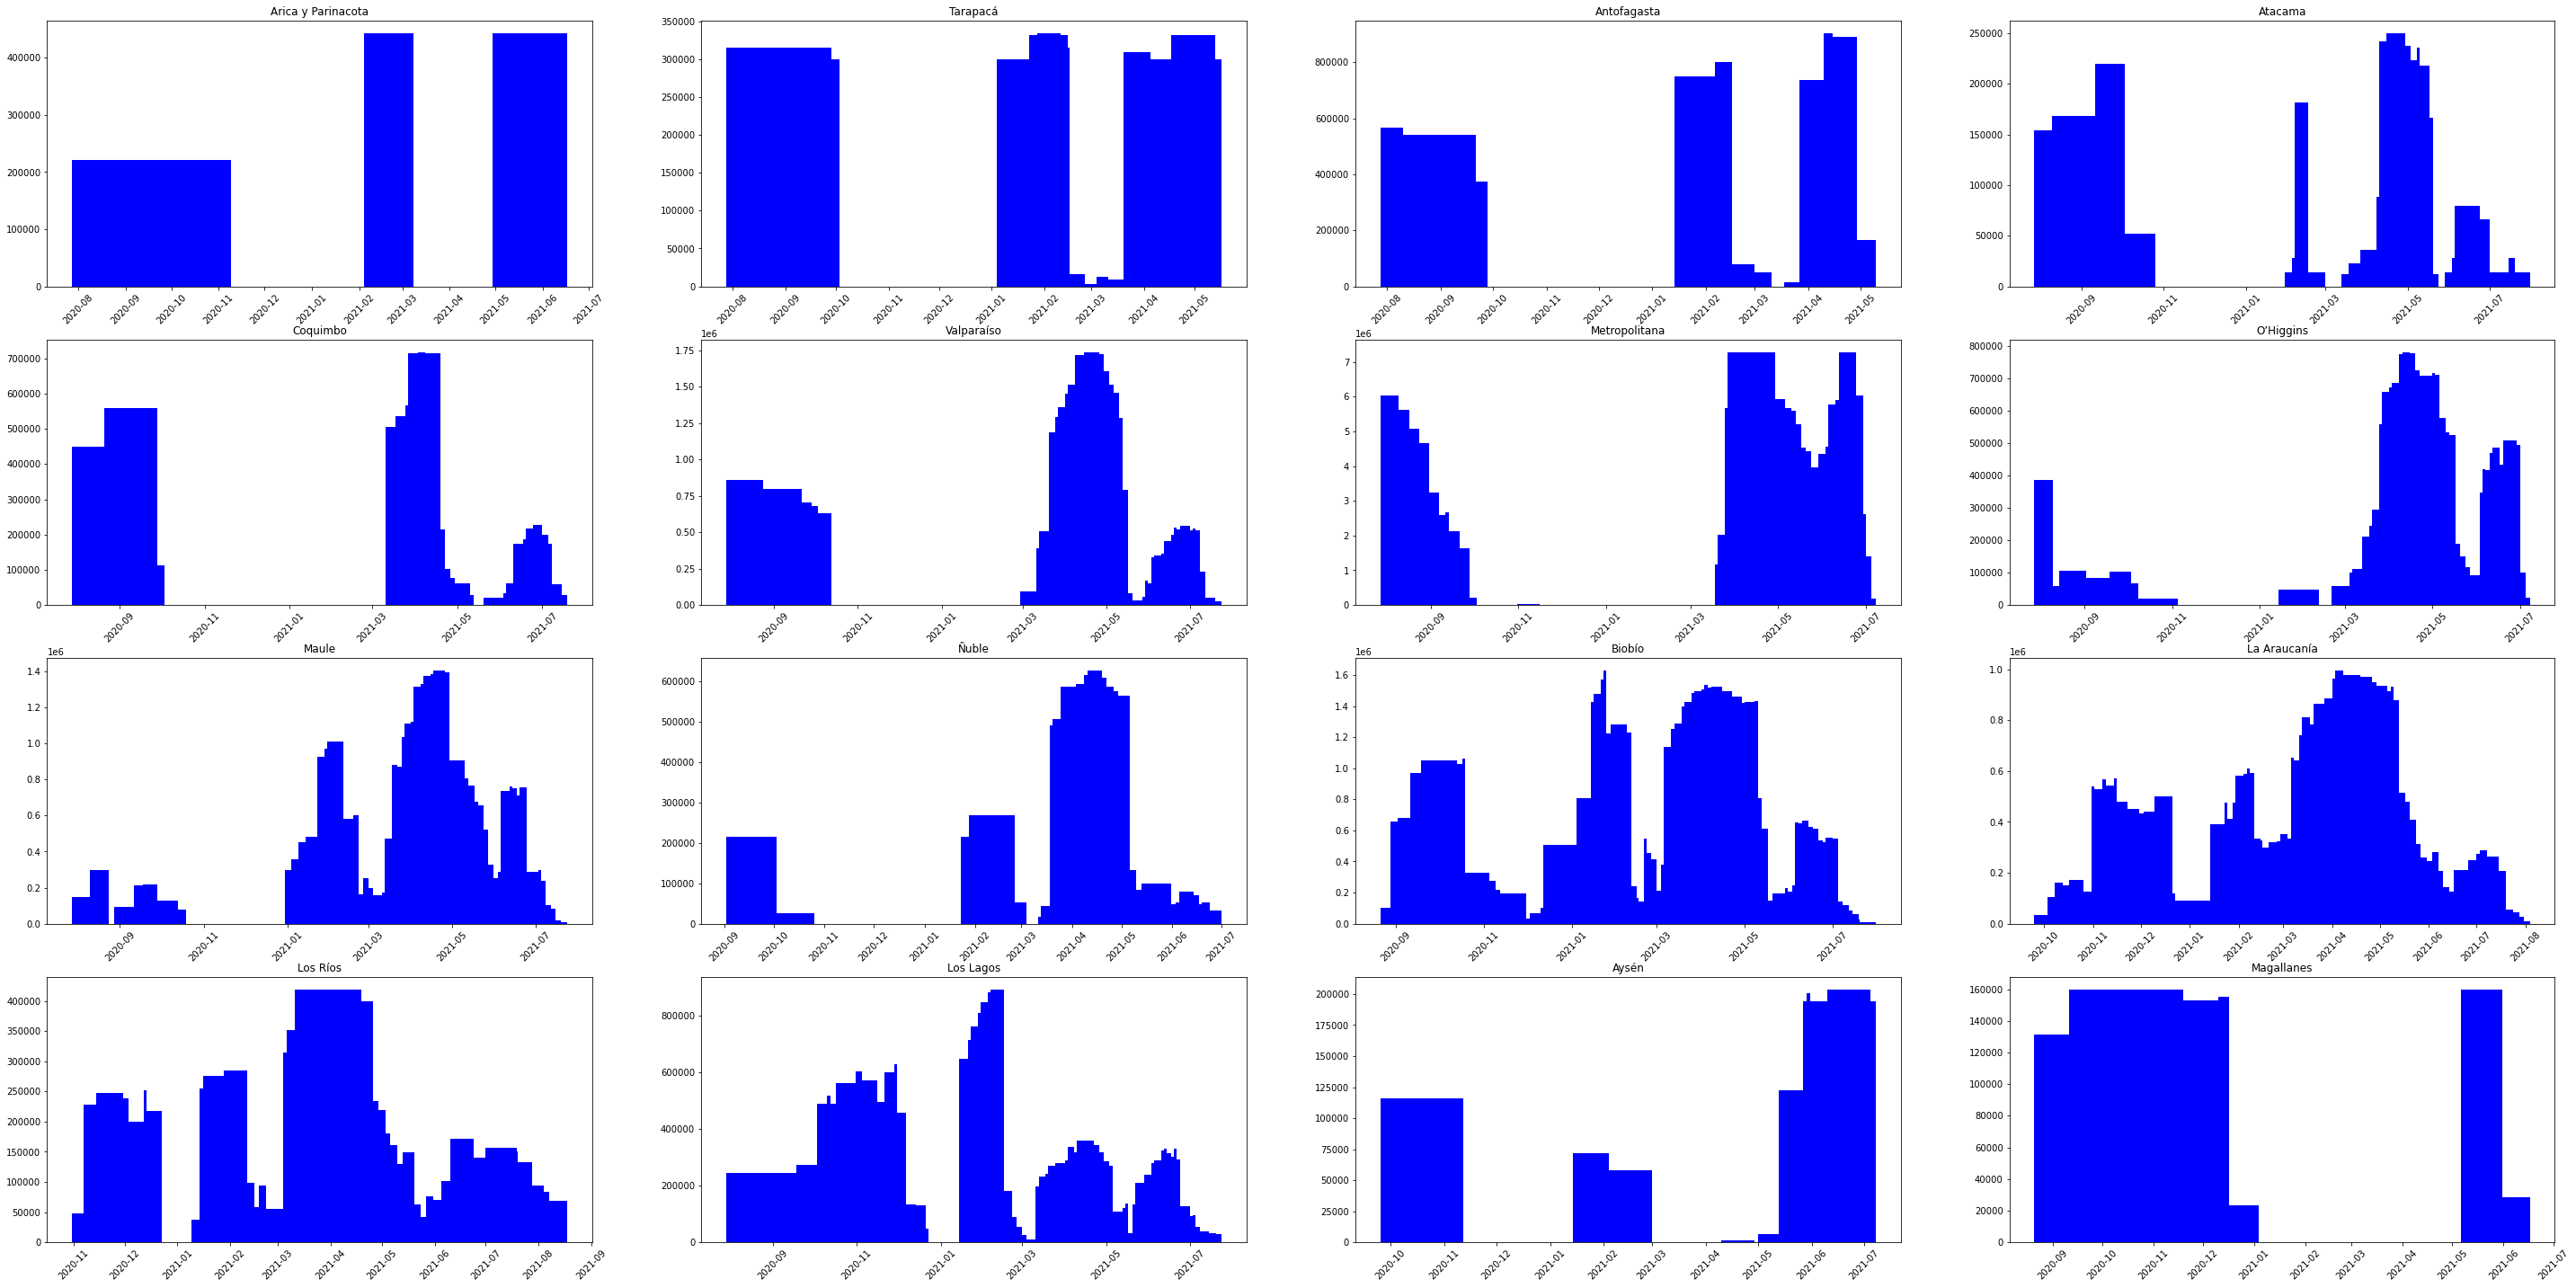

In [6]:
dataframes = []
regiones = []
fig, axs = plt.subplots(4, 4)
fig.set_size_inches(50, 25)


for region in data_regiones:
    data = pd.DataFrame(data_regiones[region].items())
    data.columns = ['Fecha','Poblacion']
    data['Fecha'] = pd.to_datetime(data['Fecha'])
    dataframes.append(data)
    
i = 0
for x in range(4):
    for y in range(4):
        axs[x, y].bar(x=dataframes[i]['Fecha'],height=dataframes[i]['Poblacion'], color=['blue'], align='edge', width=1)
        
        axs[x, y].set_title(f'{list(data_regiones.keys())[i]}')
        axs[x, y].tick_params(axis='x',labelrotation=45)
        
        i += 1

### Doble click en los graficos para agrandar 